
# IDS for IoT Classification
In this notebook, we are going to classify benign data or not, using several machine learning algorithms. The steps we are going to follow are:

- Import the necessary libraries
- Load and explore the dataset
- Preprocess the data
- Visualize the data
- Split the dataset into training and testing sets
- Train several models and evaluate their performances





In [5]:
#Imports
#Below are all the imports used in the notebook.
# Common
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


# Data Processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense


# Performace Measures
from sklearn.metrics import classification_report, confusion_matrix


# Data Loading
We start by loading the data from an excel file using pandas.
first we need to mount the drive

In [6]:
#Data
#To solve a problem we need to have a look at the problem first.
# File Path
file_path_train = 'multi class 7/train.csv'
file_path_test = 'multi class 7/test.csv'

# Load data
dfTrain = pd.read_csv(file_path_train)
dfTest=pd.read_csv(file_path_test)



# Information about the dataset

>




In [7]:
dfTrain.head()


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000838,54.62,6.05,64.00,11.961779,11.961779,0.0,0.0,0.0,0.0,...,0.111473,54.45,8.307598e+07,9.5,10.392912,0.037895,0.035900,0.02,141.55,DDoS
1,0.005486,75.88,6.00,64.00,29.502125,29.502125,0.0,0.0,1.0,0.0,...,0.100314,54.24,8.309325e+07,9.5,10.395361,0.143036,0.346802,0.03,141.55,DDoS
2,0.000000,0.00,45.61,65.81,151.517376,151.517376,0.0,0.0,0.0,0.0,...,57.165223,576.80,8.369379e+07,9.5,33.783684,80.958879,8638.780727,0.40,141.55,Mirai
3,0.000000,54.00,6.00,64.00,1.500542,1.500542,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309408e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS
4,0.004568,745.42,5.95,65.13,8.082100,8.082100,0.0,0.0,0.0,0.0,...,549.190629,927.04,8.333561e+07,9.5,41.550978,776.661367,318084.344439,0.95,141.55,DDoS


In [8]:
dfTest.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,110.797744,110.797744,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307619e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS
1,0.006453,182.88,16.67,63.60,30.905833,30.905833,0.0,0.0,0.0,0.0,...,3.072377,162.87,8.300739e+07,9.5,18.010237,4.370333,209.623265,0.05,141.55,DoS
2,31.739927,7382.93,3.23,80.15,8.923224,8.923224,0.0,0.0,0.0,0.0,...,532.284695,637.09,8.328373e+07,9.5,35.140754,752.738781,306225.702126,0.94,141.55,DDoS
3,0.000000,54.00,6.00,64.00,1.697796,1.697796,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.307650e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS
4,0.000000,54.00,6.00,64.00,1.471092,1.471092,0.0,1.0,0.0,1.0,...,0.000000,54.00,8.334428e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS


# Data Visualization
Before we proceed with any machine learning, let's visualize the data to get a sense of the classess.


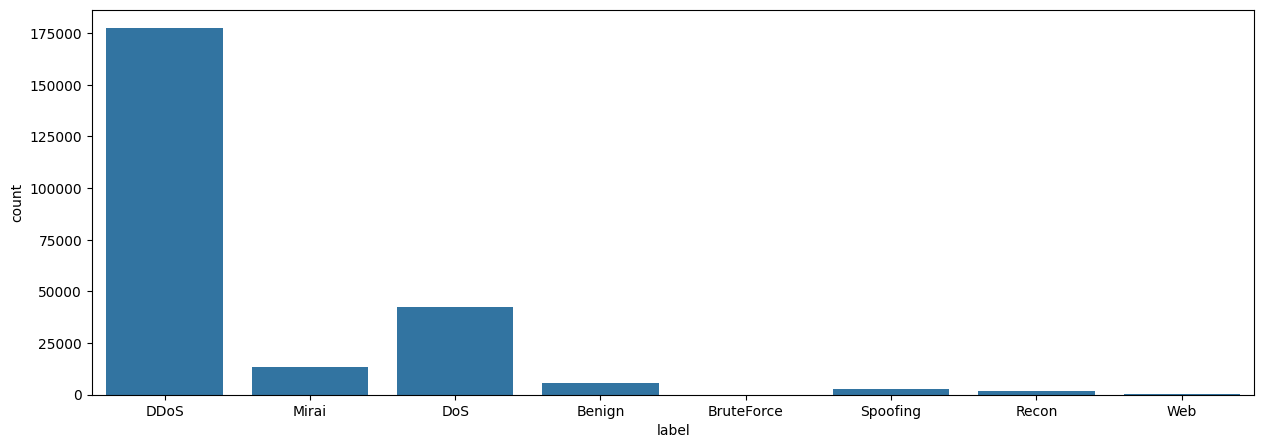

In [9]:
#Data Visualization
#Let's first have a look at the Class Distribution.
# Class Distribution
plt.figure(figsize=(15, 5))
sns.countplot(x='label', data=dfTrain)
plt.show()

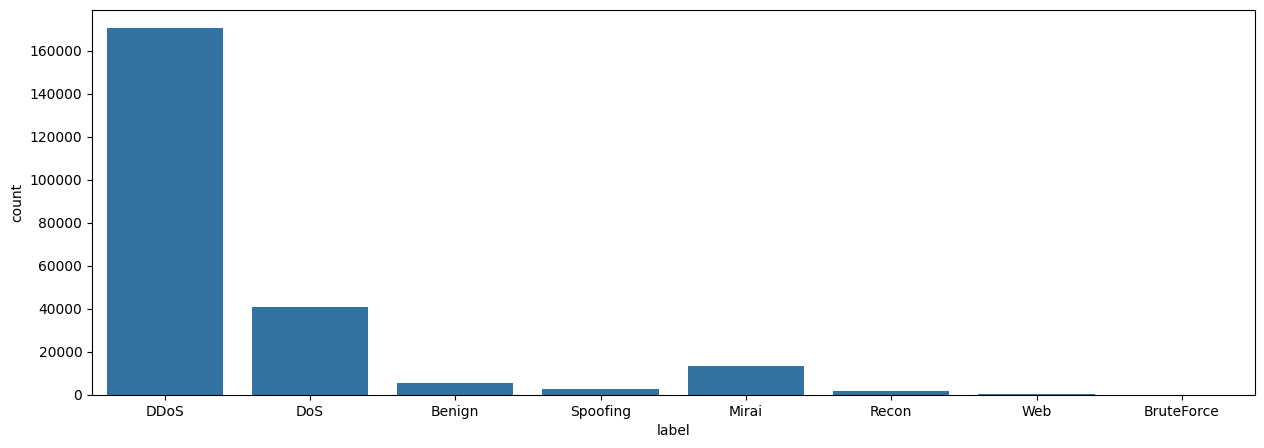

In [10]:
#Data Visualization
#Let's first have a look at the Class Distribution.
# Class Distribution
plt.figure(figsize=(15, 5))
sns.countplot(x='label', data=dfTest)
plt.show()

# Data Preprocessing
We will encode the categorical variables. Also, the features need to be scaled for some of the models to perform well.


In [11]:
dfTrain.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243649 entries, 0 to 243648
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    243649 non-null  float64
 1   Header_Length    243649 non-null  float64
 2   Protocol Type    243649 non-null  float64
 3   Duration         243649 non-null  float64
 4   Rate             243649 non-null  float64
 5   Srate            243649 non-null  float64
 6   Drate            243649 non-null  float64
 7   fin_flag_number  243649 non-null  float64
 8   syn_flag_number  243649 non-null  float64
 9   rst_flag_number  243649 non-null  float64
 10  psh_flag_number  243649 non-null  float64
 11  ack_flag_number  243649 non-null  float64
 12  ece_flag_number  243649 non-null  float64
 13  cwr_flag_number  243649 non-null  float64
 14  ack_count        243649 non-null  float64
 15  syn_count        243649 non-null  float64
 16  fin_count        243649 non-null  floa

In [12]:
le = LabelEncoder()
dfTrain.label =le.fit_transform(dfTrain.label)



dfTrain.label.value_counts()


label
2    177426
3     42363
4     13595
0      5738
6      2532
5      1790
7       136
1        69
Name: count, dtype: int64

In [13]:
dfTrain.label =le.fit_transform(dfTrain.label)

In [14]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243649 entries, 0 to 243648
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    243649 non-null  float64
 1   Header_Length    243649 non-null  float64
 2   Protocol Type    243649 non-null  float64
 3   Duration         243649 non-null  float64
 4   Rate             243649 non-null  float64
 5   Srate            243649 non-null  float64
 6   Drate            243649 non-null  float64
 7   fin_flag_number  243649 non-null  float64
 8   syn_flag_number  243649 non-null  float64
 9   rst_flag_number  243649 non-null  float64
 10  psh_flag_number  243649 non-null  float64
 11  ack_flag_number  243649 non-null  float64
 12  ece_flag_number  243649 non-null  float64
 13  cwr_flag_number  243649 non-null  float64
 14  ack_count        243649 non-null  float64
 15  syn_count        243649 non-null  float64
 16  fin_count        243649 non-null  floa

In [15]:
dfTest.label =le.fit_transform(dfTest.label)

In [16]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234745 entries, 0 to 234744
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    234745 non-null  float64
 1   Header_Length    234745 non-null  float64
 2   Protocol Type    234745 non-null  float64
 3   Duration         234745 non-null  float64
 4   Rate             234745 non-null  float64
 5   Srate            234745 non-null  float64
 6   Drate            234745 non-null  float64
 7   fin_flag_number  234745 non-null  float64
 8   syn_flag_number  234745 non-null  float64
 9   rst_flag_number  234745 non-null  float64
 10  psh_flag_number  234745 non-null  float64
 11  ack_flag_number  234745 non-null  float64
 12  ece_flag_number  234745 non-null  float64
 13  cwr_flag_number  234745 non-null  float64
 14  ack_count        234745 non-null  float64
 15  syn_count        234745 non-null  float64
 16  fin_count        234745 non-null  floa

# Splitting the Data and Scaling
The data is split into training and testing sets. This allows us to evaluate how our model performs on unseen data.


In [17]:
# Data Splitting for training
# Seperate Features and Columns
y = dfTrain.pop('label').to_numpy()
X = dfTrain.to_numpy()


In [18]:
# Data Splitting for Testing
# Seperate Features and Columns
z = dfTest.pop('label').to_numpy()
w = dfTest.to_numpy()

In [19]:
#Scaling training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
#Scaling testing
scaler = StandardScaler()
w_scaled = scaler.fit_transform(w)

# Training Models
We will train several models and evaluate their performance. We start with Logistic Regression, followed by , Decision Tree, and Random Forest and finnaly XGboost

In [21]:
X_train,w_test,y_train,z_test=train_test_split(X_scaled,y,random_state=42,shuffle=True)

In [22]:
# logistic regression WITH HEAT MAP

# number of iterations
max_iter = 300
log_reg = LogisticRegression(max_iter=max_iter)
log_reg.fit(X_train, y_train)

# predictions
y_pred = log_reg.predict(w_test)



c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.71      0.90      0.80      1435
           1       0.00      0.00      0.00        19
           2       0.84      0.99      0.91     44293
           3       0.83      0.20      0.33     10629
           4       1.00      0.99      0.99      3397
           5       0.65      0.46      0.54       449
           6       0.78      0.45      0.57       650
           7       0.00      0.00      0.00        41

    accuracy                           0.84     60913
   macro avg       0.60      0.50      0.52     60913
weighted avg       0.84      0.84      0.80     60913



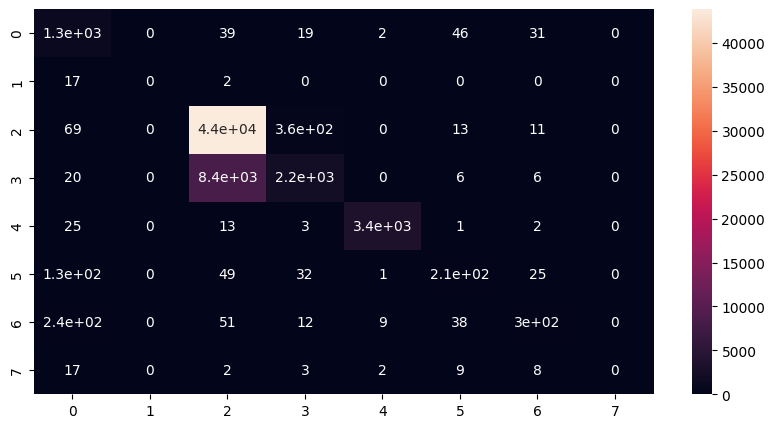

In [23]:
# measures
print(classification_report(z_test, y_pred))

# confusion matrix
cm = confusion_matrix(z_test, y_pred)
plt.figure(figsize=(10, 5))

sns.heatmap(cm, annot=True)
plt.show()

In [24]:
# ML Models

# Logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Prediction
pred = lr.predict(w_test)



c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# Calc  confusionmatrix
cm = confusion_matrix(pred, z_test)

# Show CM and classification_repor
print("Logistic Regression : \n")
print(f"\nConfusion Matrix : \n")
fig = px.imshow(cm, text_auto=True, color_continuous_scale='rdbu', width=400, height=400)
fig.show()
print(classification_report(z_test, pred))

Logistic Regression : 


Confusion Matrix : 



              precision    recall  f1-score   support

           0       0.72      0.90      0.80      1435
           1       0.00      0.00      0.00        19
           2       0.83      0.99      0.90     44293
           3       0.77      0.15      0.25     10629
           4       0.99      0.99      0.99      3397
           5       0.61      0.48      0.54       449
           6       0.76      0.45      0.57       650
           7       0.00      0.00      0.00        41

    accuracy                           0.83     60913
   macro avg       0.59      0.49      0.51     60913
weighted avg       0.82      0.83      0.78     60913



c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [26]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Prediction
pred = dtc.predict(w_test)



In [27]:
# Calc  confusion matrix
cm = confusion_matrix(pred, z_test)

# Show CM and classification_repor
print("Decision Tree Classifier : \n")
print(f"\nConfusion Matrix :")
fig = px.imshow(cm, text_auto=True, color_continuous_scale='rdbu', width=400, height=400)
fig.show()
print(classification_report(z_test, pred))

Decision Tree Classifier : 


Confusion Matrix :


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1435
           1       0.69      0.58      0.63        19
           2       1.00      1.00      1.00     44293
           3       1.00      1.00      1.00     10629
           4       1.00      1.00      1.00      3397
           5       0.82      0.82      0.82       449
           6       0.83      0.83      0.83       650
           7       0.51      0.54      0.52        41

    accuracy                           0.99     60913
   macro avg       0.84      0.83      0.84     60913
weighted avg       0.99      0.99      0.99     60913





```
# This is formatted as code
```

# Feature Importance
Let's look at the most important features according to the decision tree model.


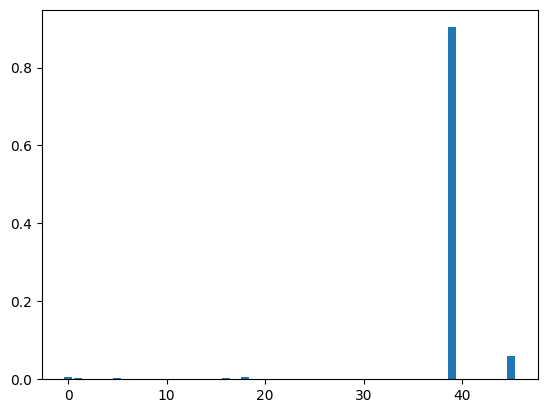

The 3 most important features are: 
IAT : 0.9032124792934701
Variance : 0.060548046223177616
flow_duration : 0.0056573921868361965


In [28]:
# Feature Importance for Decision Tree
importance = dtc.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# print the 3 most important features
print("The 3 most important features are: ")
for i in range(3):
    print(dfTrain.columns[np.argmax(importance)], ":", np.max(importance))
    importance = np.delete(importance, np.argmax(importance))




In [29]:
# Random Forest Classifier
RF = RandomForestClassifier(max_depth=4)
RF.fit(X_train, y_train)

predd = RF.predict(w_test)


In [30]:
# Calc  confusion matrix
cm = confusion_matrix(predd, z_test)

# Show CM and classification_repor
print("Random Forest Classifier : \n")
print(f"\nConfusion Matrix :")
fig = px.imshow(cm, text_auto=True, color_continuous_scale='rdbu', width=400, height=400)
fig.show()
print(classification_report(z_test, pred))

Random Forest Classifier : 


Confusion Matrix :


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1435
           1       0.69      0.58      0.63        19
           2       1.00      1.00      1.00     44293
           3       1.00      1.00      1.00     10629
           4       1.00      1.00      1.00      3397
           5       0.82      0.82      0.82       449
           6       0.83      0.83      0.83       650
           7       0.51      0.54      0.52        41

    accuracy                           0.99     60913
   macro avg       0.84      0.83      0.84     60913
weighted avg       0.99      0.99      0.99     60913



In [31]:
# XGB Classifier
XGB = XGBClassifier(max_depth=6)
XGB.fit(X_train, y_train)

# Prediction
pred = XGB.predict(w_test)



In [32]:
# Calc  confusion matrix
cm = confusion_matrix(pred, z_test)

# Show CM and classification_repor
print("XGB Classifier : \n")
print(f"\nConfusion Matrix :")
fig = px.imshow(cm, text_auto=True, color_continuous_scale='rdbu', width=400, height=400)
fig.show()
print(classification_report(z_test, pred))

XGB Classifier : 


Confusion Matrix :


              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1435
           1       0.00      0.00      0.00        19
           2       1.00      1.00      1.00     44293
           3       1.00      1.00      1.00     10629
           4       1.00      1.00      1.00      3397
           5       0.78      0.77      0.77       449
           6       0.82      0.80      0.81       650
           7       0.50      0.07      0.13        41

    accuracy                           0.99     60913
   macro avg       0.75      0.70      0.70     60913
weighted avg       0.99      0.99      0.99     60913



c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\likem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Model Comparison
Now that we have trained multiple models, let's compare their performance side-by-side.


                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.832162       0.829774
1        Decision Tree        1.000000       0.994156
2        Random Forest        0.979566       0.994156
3                  XGB        0.999732       0.993548


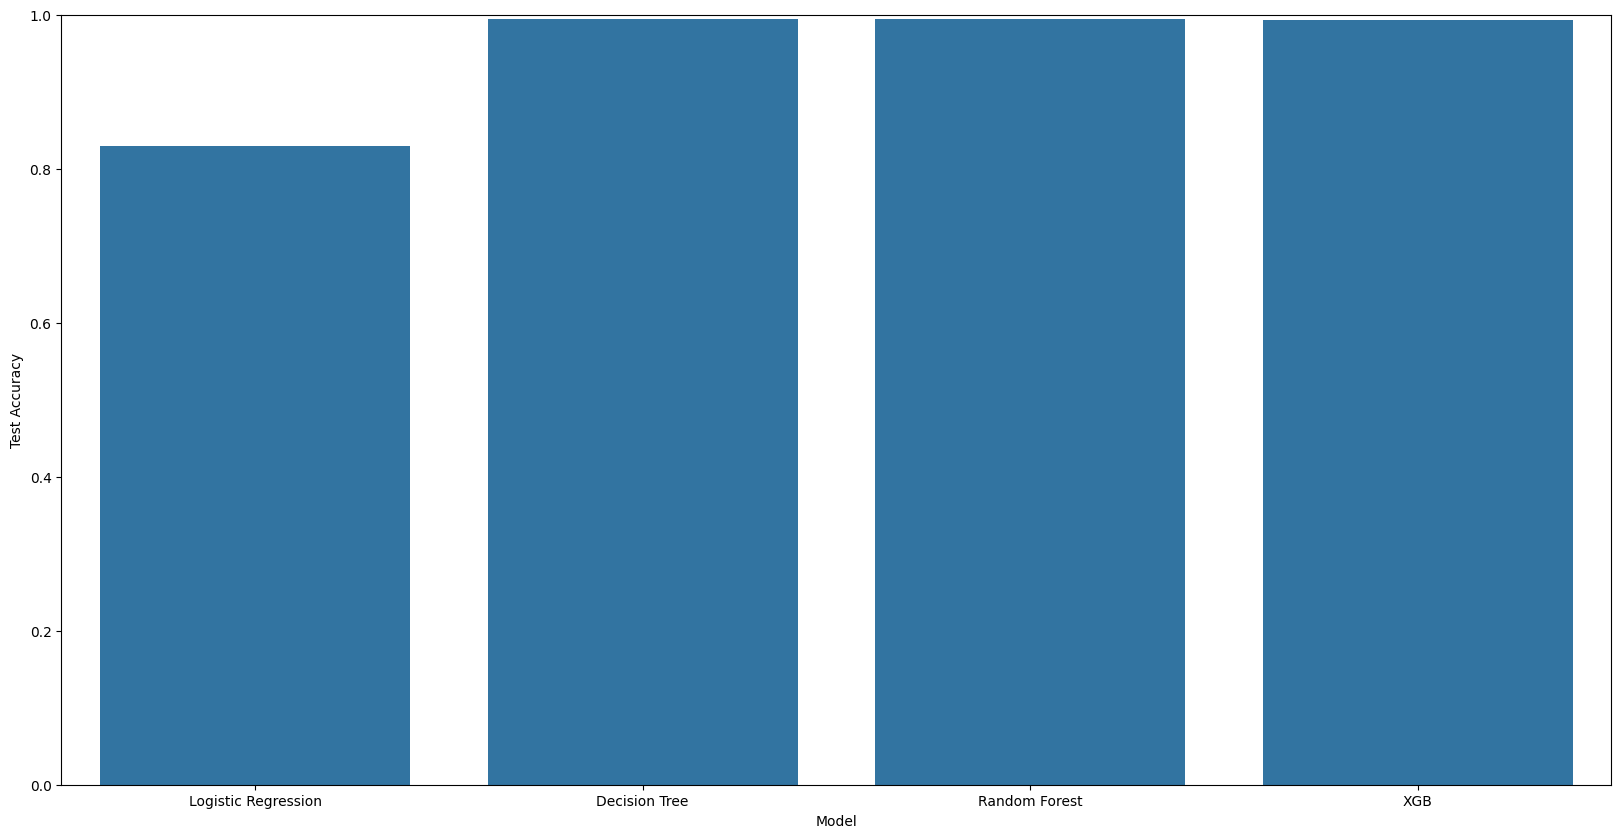

In [33]:
# Create a list to hold each model's results
model_results = []

# After training and evaluating each model, add its results to the list. For example:

model_results.append(['Logistic Regression', lr.score(X_train, y_train), lr.score(w_test, z_test)])
model_results.append(['Decision Tree', dtc.score(X_train, y_train), dtc.score(w_test, z_test)])
model_results.append(['Random Forest', RF.score(X_train, y_train), dtc.score(w_test, z_test)])
model_results.append(['XGB', XGB.score(X_train, y_train), XGB.score(w_test, z_test)])

# Now, create a DataFrame from the results
model_comparison_df = pd.DataFrame(model_results, columns=['Model', 'Train Accuracy', 'Test Accuracy'])

# Print the DataFrame
print(model_comparison_df)

# Plot the results and since there scores are similar then we must make the y axis from 0.8 to 1.0

plt.figure(figsize=(20, 10))
sns.barplot(x='Model', y='Test Accuracy', data=model_comparison_df)
plt.ylim(0, 1.0)
plt.show()



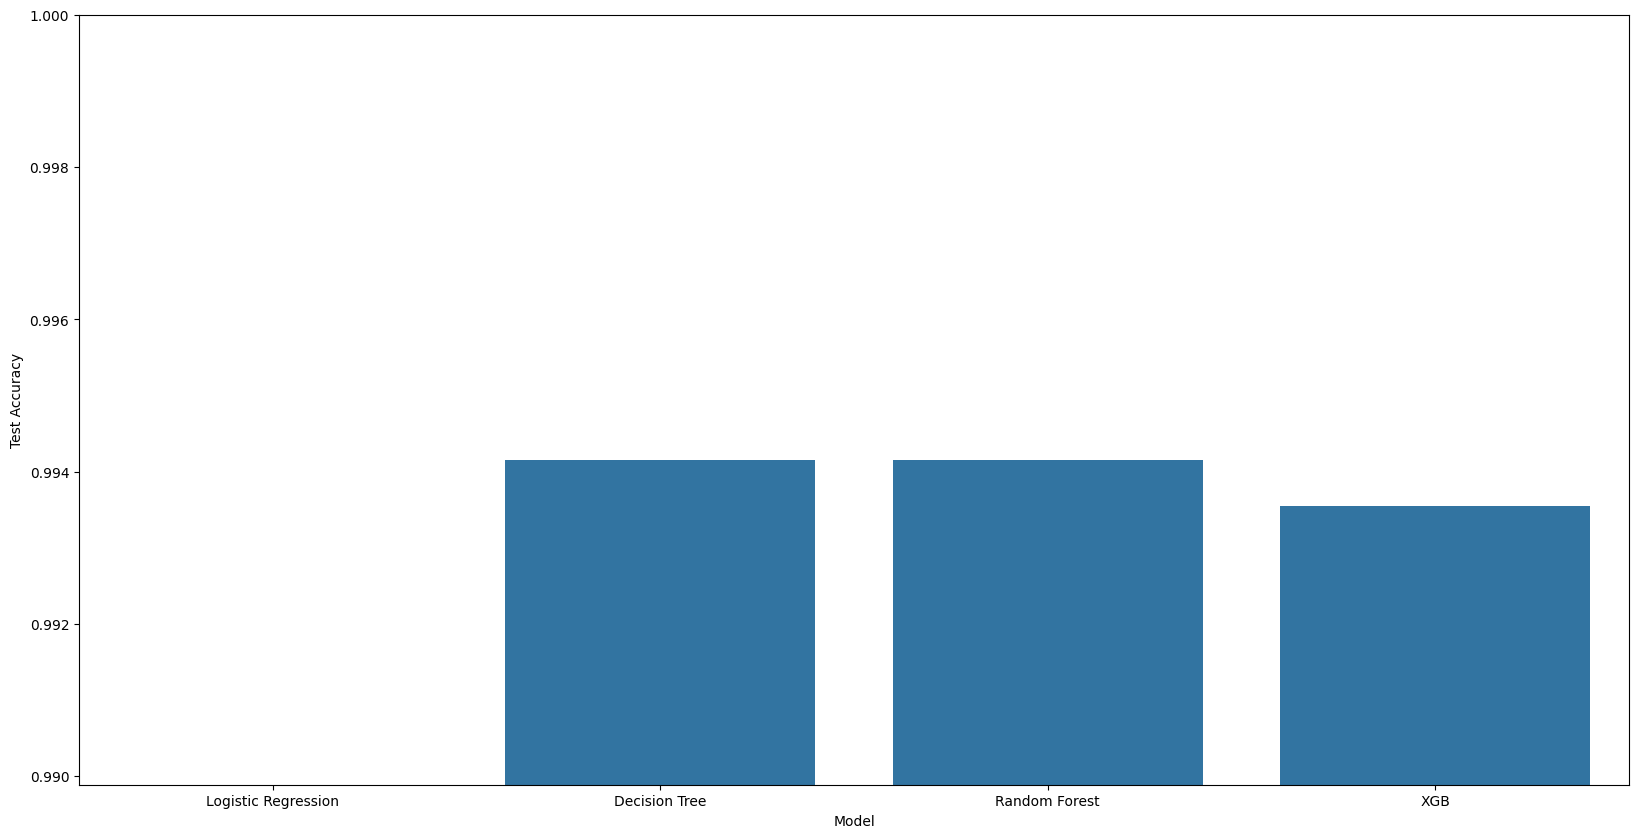

In [34]:
# Plot the results and since there scores are similar then we must make the y axis from 0.8 to 1.0


plt.figure(figsize=(20, 10))
sns.barplot(x='Model', y='Test Accuracy', data=model_comparison_df)
plt.ylim(0.989888, 1.0)
plt.show()
